# Capstone Two - Modeling

# Recap

# Analysis Goal

The main goal of this analysis is to derive insights around if a fellow will ultimately be placed at a company and how long until a placement can be expected.

# Pre-processing and Training

Notes:
    The simple linear regression model explained 5% of the variance on the train set and 3% on the test set.
    Pipeline was built to compare X_train.mean() and X_train.median() imputation on linear regression model
    

In [629]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [630]:
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing 
import warnings # For handling error messages.
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [631]:
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from matplotlib.colors import ListedColormap

In [632]:

df=pd.read_csv("Data_Pathrise.csv")

# Choosing a dependent variable

There are two main goals that this analysis must achieve. 
1. how long until a placement can be expected?
The program_duration_days is a dependent of variable. It depends on number of applications and number of interviews. I learned from the exploratory analysis that fellows who turned in lots of applications were less likely to be placed according to the data, but fellows with good amount of interviews were placed. Hence, I will considered number of interviews as my independent variables and use the program duration as dependent variable.

2. what determines if a fellow will ultimately be placed at a company.
Based on Hyperparameter search using GridSearchCV during Pre-processing and training, "program_duration_days" was the Best random forest regressor feature in terms of importance followed by number of applications and then number of interviews. This means an insight into a fellow's placement could be driven using the data in three columns. 

 The #1 is a classification problem. So I will answer this last using logistic regression. I will create a ML model that will look at other features in the dataset to determine if a certain fellow will be placed or not. For this question, I will pick "placed" as my dependent variable. 


# Modeling

# 1. how long until a placement can be expected?

# Training and Test Datasets

In [633]:
df=df.dropna()


In [634]:
X = df[["number_of_interviews"]] 
y = df[["program_duration_days"]]

# The test_size--> train with 70% of the data, and test on 30%. 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, 
                                                    random_state=47)

In [635]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(691, 15) (691, 1)
(297, 15) (297, 1)


In [636]:
names_list = ['company_status', 'primary_track', 'cohort_tag', 'employment_status ', 'highest_level_of_education', 'length_of_job_search',
             'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'race', 'gender']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

/Applications/anaconda3/envs/springboard/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((691, 4), (297, 4))

In [637]:
X_train.dtypes

id                          int64
program_duration_days     float64
number_of_interviews      float64
number_of_applications      int64
dtype: object

# Making a Linear Regression model: first model

In [638]:
FModel = linear_model.LinearRegression(normalize=True)

In [639]:
FModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [640]:
FModel.score(X_train, y_train) #geting Rsquare value

1.0

This model is very good at predicting program duration using number of interviews. Rsquare value is 1.

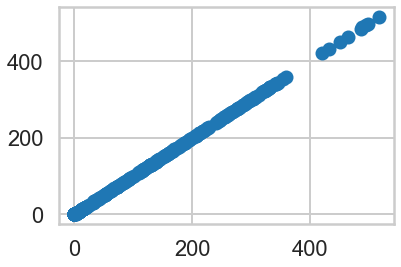

In [641]:
#Visualization of the model prediction.
y_pred = FModel.predict(X_test)
plt.scatter(y_test,y_pred)

# Ordinary Least Squares (OLS) Model: Second model

In [642]:
X = df[["number_of_interviews"]]
X = sm.add_constant(X)

In [643]:
y = df[["program_duration_days"]]

# Splitting the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [644]:
#Building the second model
SModel = sm.OLS(y_train, X_train)

# Fitting the model
SModel_results = SModel.fit()
# Evaluating the model
SModel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     program_duration_days   R-squared:                       0.003
Model:                               OLS   Adj. R-squared:                  0.002
Method:                    Least Squares   F-statistic:                     2.404
Date:                   Mon, 05 Jul 2021   Prob (F-statistic):              0.121
Time:                           22:03:39   Log-Likelihood:                -4632.9
No. Observations:                    741   AIC:                             9270.
Df Residuals:                        739   BIC:                             9279.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  134.0286      5.777     23.200      0.000     122.687     145.370
number_of_interviews    -2.3738      1.531     -1.551      0.121      -5.379       0.632
==============================================================================
Omnibus:                       84.061   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.464
Skew:                           0.943   Prob(JB):                     6.25e-25
Kurtosis:                       3.238   Cond. No.                         4.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model seems like a round up of the first model with Rsquare of 0.003. Not good.

Text(0, 0.5, 'Predicted')

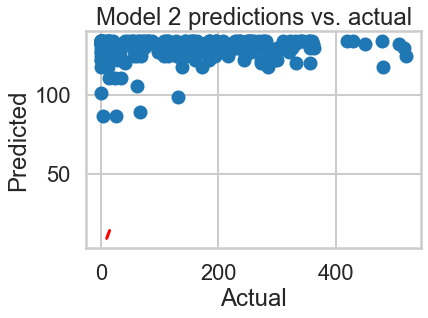

In [645]:
#using the second model to make prediction.
y_pred = SModel_results.predict(X_test)

plt.scatter(y_test, y_pred)

plt.plot([x for x in range(9,15)],[x for x in range(9,15)], color='red')

plt.title("Model 2 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Third model: multiple linear regression¶

In [646]:
X = df.drop(["program_duration_days", "number_of_interviews"],axis=1)

In [647]:
X = sm.add_constant(X)
y = df[["program_duration_days"]]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

In [648]:
y_train.dtypes

program_duration_days    float64
dtype: object

In [649]:
np.asarray(X_train)

array([[1.0, 462, 'Withdrawn', ..., 100, 'Male',
        'East Asian or Asian American'],
       [1.0, 1413, 'Placed', ..., 1, 'Male',
        'East Asian or Asian American'],
       [1.0, 368, 'Placed', ..., 25, 'Male',
        'Non-Hispanic White or Euro-American'],
       ...,
       [1.0, 773, 'Placed', ..., 7, 'Male',
        'South Asian or Indian American'],
       [1.0, 739, 'Placed', ..., 10, 'Male',
        'Non-Hispanic White or Euro-American'],
       [1.0, 1037, 'Placed', ..., 150, 'Male',
        'South Asian or Indian American']], dtype=object)

In [650]:
names_list = ['company_status', 'primary_track', 'cohort_tag', 'employment_status ', 'highest_level_of_education', 'length_of_job_search',
             'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'race', 'gender']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

/Applications/anaconda3/envs/springboard/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((691, 4), (297, 4))

In [651]:
# Create the model
rModel3 = sm.OLS(y_train, X_train)
# Fit the model
rModel3_results = rModel3.fit()

In [652]:
# Evaluate the model
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     program_duration_days   R-squared:                       0.079
Model:                               OLS   Adj. R-squared:                  0.075
Method:                    Least Squares   F-statistic:                     19.59
Date:                   Mon, 05 Jul 2021   Prob (F-statistic):           3.39e-12
Time:                           22:03:40   Log-Likelihood:                -4284.2
No. Observations:                    691   AIC:                             8576.
Df Residuals:                        687   BIC:                             8595.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     82.7360     10.432      7.931      0.000      62.253     103.219
id                         0.0098      0.006      1.573      0.116      -0.002       0.022
placed                    69.3109      9.126      7.595      0.000      51.392      87.229
number_of_applications    -0.0207      0.097     -0.214      0.831      -0.210       0.169
==============================================================================
Omnibus:                      128.646   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.353
Skew:                           1.223   Prob(JB):                     6.96e-45
Kurtosis:                       4.040   Cond. No.                     3.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-Squared score here is about 8% unlike the second model.

Text(0, 0.5, 'Predicted')

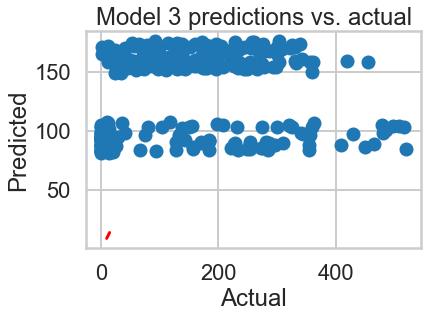

In [653]:
# Using the multiple linear regression model to make predictions
y_pred = rModel3_results.predict(X_test)

plt.scatter(y_test, y_pred)

plt.plot([x for x in range(9,15)],[x for x in range(9,15)], color='red')


plt.title("Model 3 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [654]:
#Using Root Mean Squared Error to see how far out the model is from the correct answer
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

y_pred = rModel3_results.predict(X_test)
matches = pd.DataFrame(y_test)
matches.rename(columns = {'program_duration_days':'actual'}, inplace=True)
matches["predicted"] = y_pred

rmse(matches["actual"], matches["predicted"])

129.32478985414906

The model is 129.32 away from correct answer.

# Avoiding redundancy: Last Model

In [655]:
X = df[['number_of_applications','number_of_interviews', 'placed']]

# Creating constants for X, so the model knows its bounds
X = sm.add_constant(X)

y = df[["program_duration_days"]]

# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [656]:
# Creating the third model
LModel = sm.OLS(y_train, X_train)
# Fitting the model
LModel_results = TModel.fit()
# Evaluating the model
LModel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     program_duration_days   R-squared:                       0.068
Model:                               OLS   Adj. R-squared:                  0.064
Method:                    Least Squares   F-statistic:                     18.00
Date:                   Mon, 05 Jul 2021   Prob (F-statistic):           2.78e-11
Time:                           22:03:41   Log-Likelihood:                -4607.9
No. Observations:                    741   AIC:                             9224.
Df Residuals:                        737   BIC:                             9242.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    104.9130      7.874     13.324      0.000      89.455     120.371
number_of_applications    -0.0409      0.095     -0.430      0.668      -0.228       0.146
number_of_interviews      -2.9223      1.487     -1.966      0.050      -5.841      -0.004
placed                    64.0746      8.964      7.148      0.000      46.476      81.673
==============================================================================
Omnibus:                      134.214   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.573
Skew:                           1.211   Prob(JB):                     3.10e-46
Kurtosis:                       3.958   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is perhaps the third best model for predicting the program duration with Rsquare value of 0.068.

In [657]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

y_pred = TModel_results.predict(X_test)
matches = pd.DataFrame(y_test)
matches.rename(columns = {'program_duration_days':'actual'}, inplace=True)
matches["predicted"] = y_pred

rmse(matches["actual"], matches["predicted"])

124.12422509866417

The RMSE tells us about predicted error and a high RMSE like 124.25 shows that the model is very far from predicting it correctly.

#  2. what determines if a fellow will ultimately be placed at a company

# Logistic Regression

At this point of the analysis, it is clear that for a fellow to be classified as placed, he or she must at least turn in some applications, and be at least admitted into the program. On this logistic regression i will be using 'program_duration_days','number_of_applications' and 'placed' to build a machine learning model that will classify a fellow as placed or not. The model will have two main color. red will denote that a fellow will not be placed while blue will denote a fellow will be placed.

# Training and Test Datasets

In [658]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df[['program_duration_days','number_of_applications', 'number_of_interviews']].values, 
                                              (df.placed == 1).values,random_state=5)

clf = LogisticRegression()
# Fitting the model on the trainng data.
clf.fit(Xlr, ylr)
# Printing the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.6518218623481782


# Tuning the Model

I will be using a mixture of cross-validation and grid search in tuning my model. I will also be using the regularization parameter c to control for unlikely high regression coefficients. After that, I will use cv_score function to perform K-fold cross-validation and apply a scoring function to each test fold. My defaulting score function will be the accuracy score.

In [659]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # splitting data into train/test groups, 5 times
        clf.fit(x[train], y[train]) 
        result += score_func(clf.predict(x[test]), y[test]) # evaluating score function on held-out data
    return result / nfold # averaging the result and nfold

Basic logistic regression model without regularization

In [660]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.6221476510067114


In [661]:
#setting up grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

for C in Cs:
    model=LogisticRegression()
    av_score = cv_score(model, Xlr, ylr)
    print("for C :", C)
    print("average score is:", av_score)

for C : 0.001
average score is: 0.6221476510067114
for C : 0.1
average score is: 0.6221476510067114
for C : 1
average score is: 0.6221476510067114
for C : 10
average score is: 0.6221476510067114
for C : 100
average score is: 0.6221476510067114


In [662]:
#Creating logistic Regression model
model=LogisticRegression(C=10)
# Fitting the model on the trainng data.
model.fit(Xlr, ylr)
y_pred=model.predict(Xtestlr)
acc_score = accuracy_score(ytestlr, y_pred)
acc_score

0.6518218623481782

# Cross validation and Grid search

# Black Box Grid Search

In [663]:
from sklearn.model_selection import GridSearchCV
model=LogisticRegression()
Cs = {'C': [0.001, 0.1, 1, 10, 100]}
b_model= GridSearchCV(model, Cs, cv=5)
b_model.fit(Xlr, ylr)
y_pred=b_model.predict(Xtestlr)
acc_score = accuracy_score(ytestlr, y_pred)
acc_score

0.6518218623481782

# Setting up Demo Code for classification

In [664]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5): # this function implement clf as a dictionary and split thr training sets into 5 folds.
    gs = sklearn.model_selection.GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_) #prints the best value of the parameters
    best = gs.best_estimator_
    return best #returns the best classifier

next step is to fit the best classifier on the entire training set using a defined function, do_classify. The dataframe is split into 80% training and 20% testing by default, standardizing the dataset.

In [665]:
from sklearn.model_selection import train_test_split

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain) # obtaining the best classify using cv_optimize
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [666]:

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection

c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, 
                cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, 
               s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, 
               alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, 
                     cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, 
                           colorscale=colorscale, cdiscrete=cdiscrete, 
                           psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    #plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

In [667]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           df, ['program_duration_days','number_of_applications'], 'placed', 1)

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.62
Accuracy on test data:     0.59


<ipython-input-666-c11e95cd7d8f>:57: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
<ipython-input-666-c11e95cd7d8f>:58: UserWarning: The following kwargs were not used by contour: 'axes'
  cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)


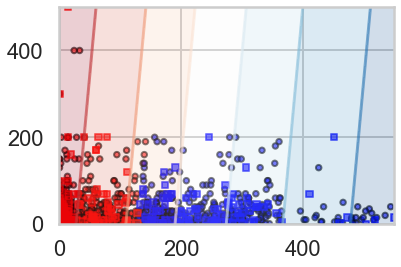

In [668]:
plt.figure()
ax = plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=30, alpha=0.6);

The figure above shows the results of the logistic regression with plots of the actual labels of both the training(circles) and test(squares) samples. The 0's (non-placed fellows) are plotted in red, the 1's (placed) in blue. Most of the fellows are classified well while some where misclassified on both sides. The model has 67% accuracy on the testing data and 59% accuracy on the training data.

# Selecting The best Models

The best model for the linear regression was the first model built with sklearn built in model. It predicted the program duration 100% by looking at the number of interviews.It showed that number of interview has a linear relationship with program duration days although the plot shows some breaks as program duration increases. This could mean that fellows who were mostly placed had lots of interview at the beginning of the program. The fellows who were unlikely to be placed before exiting the program starts getting interviews towards the end of their on their contract with Pathrise.

The machine learning model built for classification showed an increase in accuracy on the testing data, about 2% better than the Black Boc GridSearch logistic model.

# Extra

During the exploratory data analysis, I said I won't use gender to do this analysis as I don't believe a fellow being placed is related to a fellow's gender. In case you want to see how the important features and gender looks, I made seaborn plots below for it and also did a visualization for program duration, placement and gender.

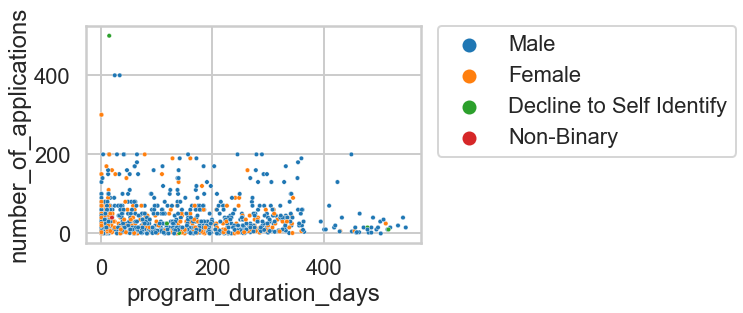

In [669]:
sns.scatterplot(data=df, x="program_duration_days", y="number_of_applications", hue="gender", s= 20, color=".2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

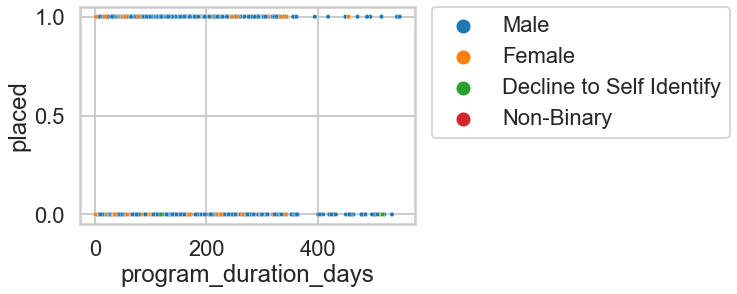

In [670]:
sns.scatterplot(data=df, x="program_duration_days", y="placed", hue="gender", s= 20, color=".2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [671]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           df, ['program_duration_days','placed'], 'gender', 'Male')

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.72
Accuracy on test data:     0.70


<ipython-input-666-c11e95cd7d8f>:57: UserWarning: The following kwargs were not used by contour: 'axes'
  plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
<ipython-input-666-c11e95cd7d8f>:58: UserWarning: The following kwargs were not used by contour: 'axes'
  cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)


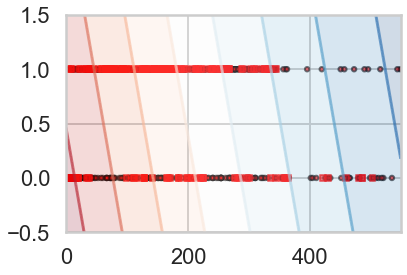

In [672]:
plt.figure()
ax = plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=20, alpha=0.6);

red means males while blue means females.